# 练习任务1：构建更深的网络训练更好的模型

* step1 加载必要的库函数

In [2]:
# for tf2.0
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Activation, Conv2D,Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback
from historycal_tf2 import LossHistory
import matplotlib.pyplot as plt
#

* step2 minist数据在keras中自带，可以通过网络加载

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


(60000, 28, 28) (10000, 28, 28)


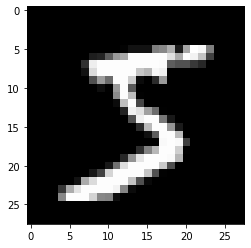

In [4]:
# confirm the data dimention
print(X_train.shape, X_test.shape) 
plt.imshow(X_train[0,:,:], cmap='gray')

* step3 标准化处理

In [5]:
# data pre-processing
X_train = X_train.reshape(X_train.shape[0], -1) / 255   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255      # normalize

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(X_train.shape)

(60000, 784)


* step4 构建更深的网络

In [6]:
# model-sequential
model = Sequential([
    Dense(128, input_dim=784),
    Activation('relu'),
    Dense(128, input_dim=128),
    Activation('relu'),
    Dense(64, input_dim=128),
    Activation('relu'),
    Dense(64, input_dim=64),
    Activation('relu'),
    Dense(32, input_dim=64),
    Activation('relu'),
    Dense(32, input_dim=32),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4

In [7]:
# model-function
inputs = Input(shape=(784,))
x = Dense(128)(inputs)
x = Activation('relu')(x)
x = Dense(128)(x)
x = Activation('relu')(x)
x = Dense(64)(x)
x = Activation('relu')(x)
x = Dense(64)(x)
x = Activation('relu')(x)
x = Dense(32)(x)
x = Activation('relu')(x)
x = Dense(32)(x)
x = Activation('relu')(x)
x = Dense(10, activation='softmax')(x)
model=Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_9 (Activation)    (None, 64)                0     

* setp5 训练模型

In [8]:
# Another way to define your optimizer
rmsprop = RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
# We add metrics to get more results you want to see
model.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
print('Training ------------')
# Another way to train the model
histories=LossHistory_tf2()
history =model.fit(X_train, y_train, epochs=10, verbose=1, shuffle=True,batch_size=128,validation_data=(X_test,y_test),callbacks=histories)

Training ------------
Epoch 1/20
469/469 [==============================] - 8s 12ms/step - loss: 1.1388 - accuracy: 0.6974 - val_loss: 0.4368 - val_accuracy: 0.8817
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3553 - accuracy: 0.9016 - val_loss: 0.2908 - val_accuracy: 0.9163
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2669 - accuracy: 0.9254 - val_loss: 0.2356 - val_accuracy: 0.9315
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2239 - accuracy: 0.9359 - val_loss: 0.2042 - val_accuracy: 0.9393
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1934 - accuracy: 0.9452 - val_loss: 0.1912 - val_accuracy: 0.9430
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1709 - accuracy: 0.9512 - val_loss: 0.1689 - val_accuracy: 0.9509
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1522 - accuracy: 0.9558 - val_loss: 0.1649 

In [ ]:
histories.loss_plot('epoch','./')
histories.loss_plot('batch','./')
histories.h5_save('./history.hdf5')

(100, 10)
[[  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]] 0


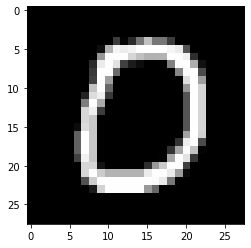

In [21]:
# test the model 
testdata= X_test[:100]
# get the probability value
pred=model.predict(testdata, batch_size=20)
# get the classification value
pred_c=np.argmax(pred, axis=1)
# pred_c=model.predict_classes(testdata,batch_size=20)
print(pred.shape)
reshapedata=testdata.reshape(-1,28,28)
plt.imshow(reshapedata[10,:,:], cmap='gray')
print(np.round(pred[:1]*100), pred_c[10])

* setp5保存模型

In [11]:
# model.save('./mnist.h5')